# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    cite= url+city
    city_url = f'{cite}&appid={weather_api_key}&units=metric'
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

     # Add 1 to the record count
    record_count += 1
    # Run an API request for each city
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the city information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
    

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | myrina
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | hadibu
Processing Record 5 of Set 1 | kruisfontein
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | utrik
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | kotel'nikovo
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | corner brook
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | pizarro
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | fale old settlement
Processing Record 18 of Set 1 | umm ruwaba
Processing Record 19 of Set 1 | nemuro
Processing Record 20 of Set 1 | remire-montjoly
Processing Record 21 of Set 1 | fuvahmulah
City not found. Skipping...
Processing R

In [5]:
# Convert the city_data into a pandas DataFrame for further analysis
city_weather_df = pd.DataFrame(city_data)

# Show Record Count
city_weather_df.count()
   

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display the first few rows of the DataFrame
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,0.38,71,100,1.72,TF,1727586976
1,myrina,39.8797,25.0742,15.58,88,20,0.00,GR,1727586978
2,blackmans bay,-43.0167,147.3167,16.52,55,100,0.45,AU,1727586980
3,hadibu,12.6500,54.0333,26.60,80,42,5.62,YE,1727586982
4,kruisfontein,-34.0033,24.7314,10.56,76,97,12.76,ZA,1727586984


In [7]:
# Export the City_Data into a csv
city_weather_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,0.38,71,100,1.72,TF,1727586976
1,myrina,39.8797,25.0742,15.58,88,20,0.00,GR,1727586978
2,blackmans bay,-43.0167,147.3167,16.52,55,100,0.45,AU,1727586980
3,hadibu,12.6500,54.0333,26.60,80,42,5.62,YE,1727586982
4,kruisfontein,-34.0033,24.7314,10.56,76,97,12.76,ZA,1727586984


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

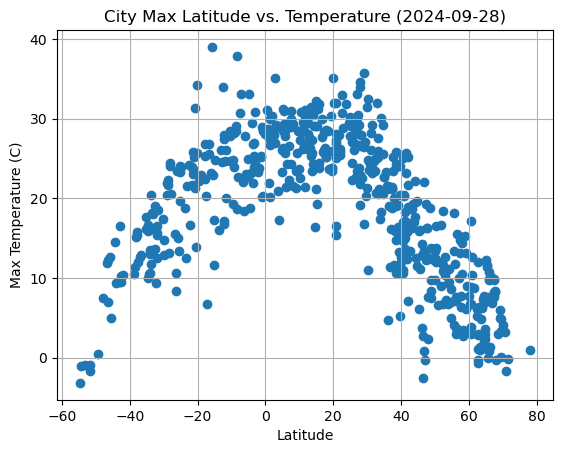

In [9]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
temprature=city_data_df['Max Temp']

plt.scatter(latitude,temprature, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

plt.show()


#### Latitude Vs. Humidity

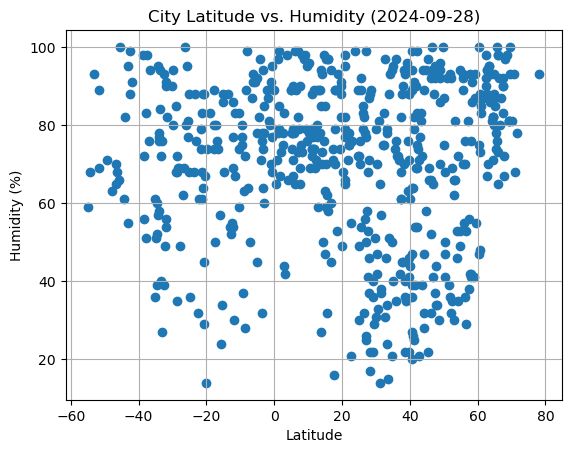

In [10]:
# Build scatter plot for latitude vs. temperature
latitude= city_data_df['Lat']
humidity=city_data_df['Humidity']

plt.scatter(latitude,humidity, marker='o',)
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

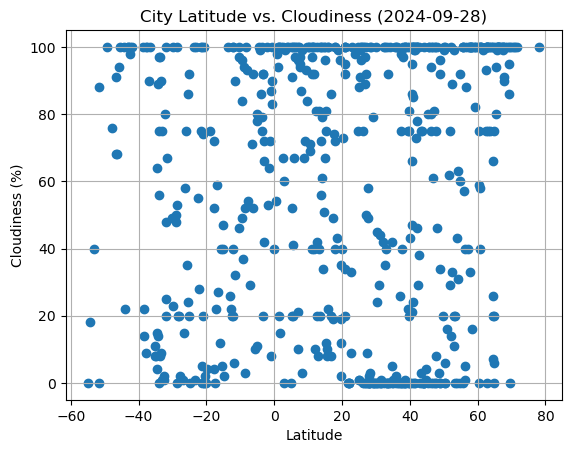

In [11]:
# Build the scatter plots for latitude vs. cloudiness
latitude= city_data_df['Lat']
cloudiness=city_data_df['Cloudiness']

plt.scatter(latitude,cloudiness, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

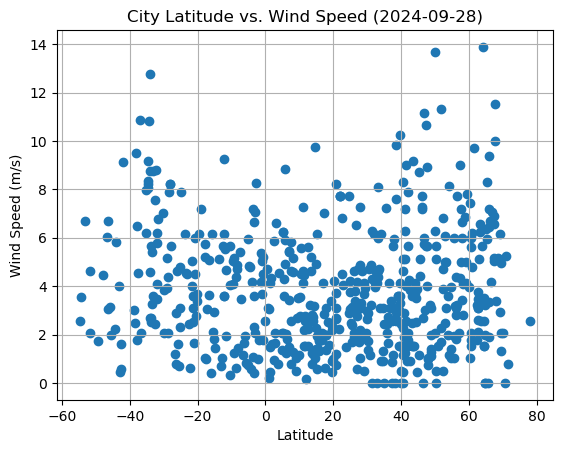

In [12]:
# Build the scatter plots for latitude vs. wind spee
latitude= city_data_df['Lat']
windspeed=city_data_df['Wind Speed']

plt.scatter(latitude,windspeed, marker='o',)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-09-28)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [17]:
# Extracting the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,myrina,39.8797,25.0742,15.58,88,20,0.00,GR,1727586978
3,hadibu,12.6500,54.0333,26.60,80,42,5.62,YE,1727586982
6,utrik,11.2278,169.8474,26.23,88,100,7.27,MH,1727586988
7,bethel,41.3712,-73.4140,16.12,90,100,2.57,US,1727586990
9,kotel'nikovo,47.6317,43.1461,16.25,34,8,8.92,RU,1727586994


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,0.38,71,100,1.72,TF,1727586976
2,blackmans bay,-43.0167,147.3167,16.52,55,100,0.45,AU,1727586980
4,kruisfontein,-34.0033,24.7314,10.56,76,97,12.76,ZA,1727586984
5,port lincoln,-34.7333,135.8667,16.11,51,8,9.17,AU,1727586986
8,grytviken,-54.2811,-36.5092,-1.08,68,18,3.55,GS,1727586992


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7160662706736385


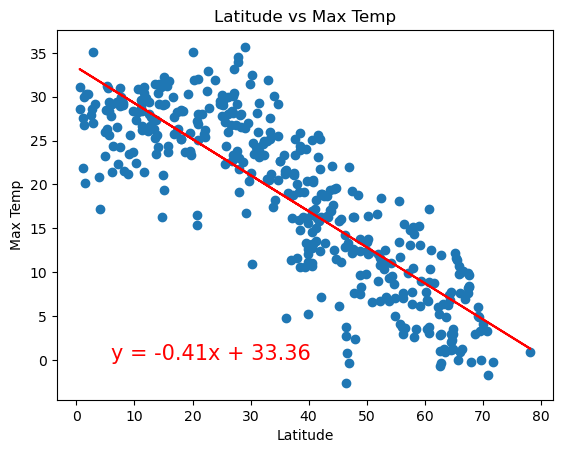

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^2-value is: 0.609144606058002


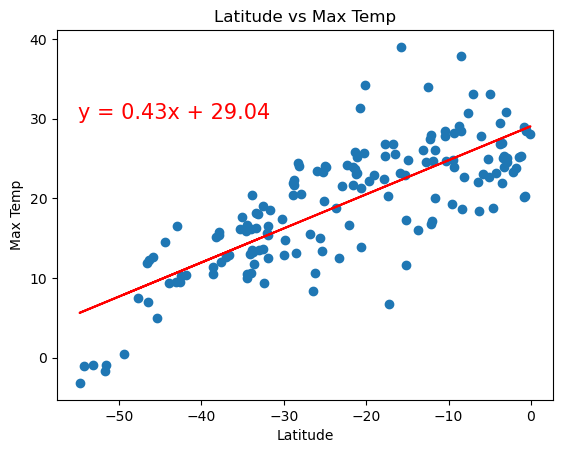

In [23]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

# Discussion about the linear relationship: YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0007718822808505831


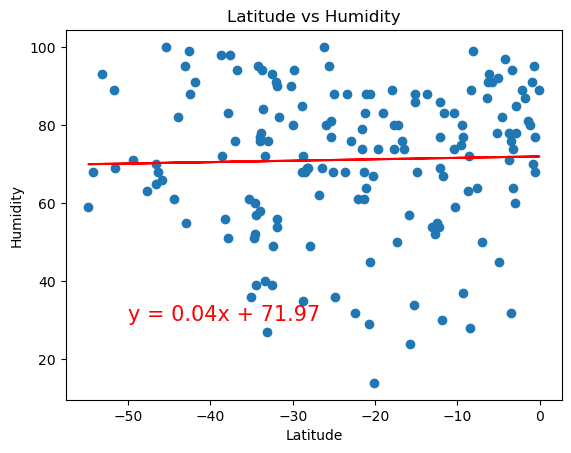

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

The r^2-value is: 0.0007718822808505831


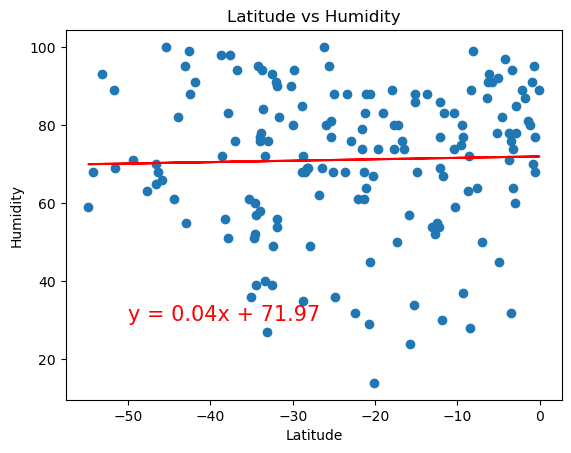

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 30))

# Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0038236760625927325


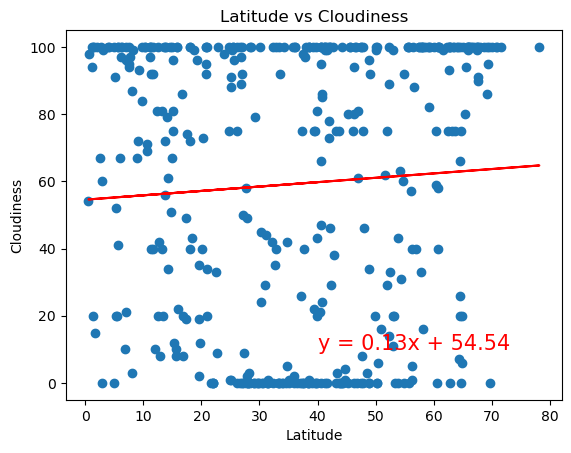

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r^2-value is: 0.004039998401539749


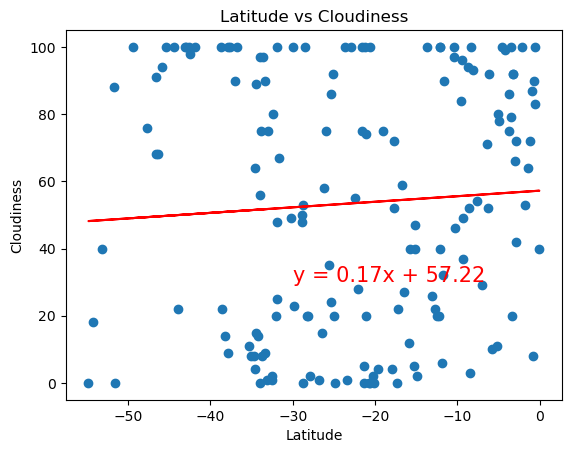

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

# Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.03552574074631834


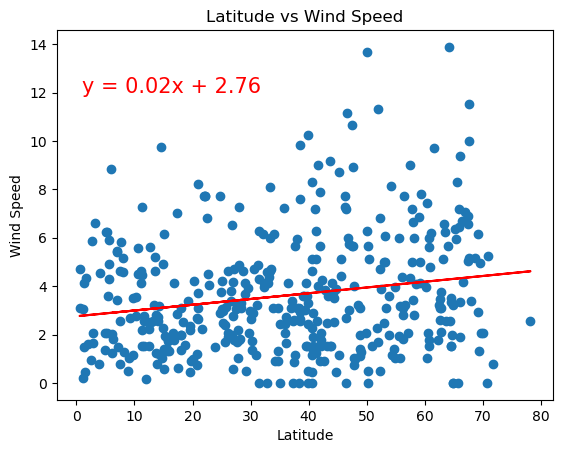

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (1,12))

The r^2-value is: 0.037509458381405784


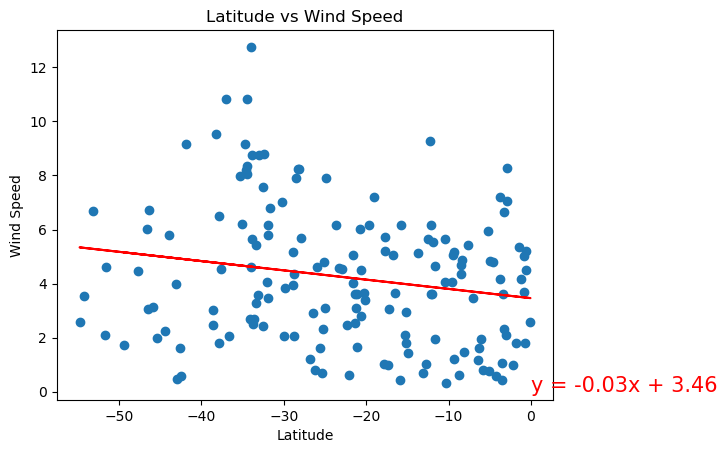

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,0))

# Discussion about the linear relationship:** YOUR RESPONSE HERE